In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [3]:
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
    c_anterior = []
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")
    else:
        for i in range(max_iter):
            c = (a*f(b)-b*f(a))/(f(b)-f(a))
            c_anterior.append(c)
            if abs(f(c)) < tol:
                return c, c_anterior, i + 1
            elif f(c) * f(a) > 0:
                a = c
            else:
                b = c
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [4]:
f= lambda x: (x**2)-4
regula_falsi(f,1,3)

(1.9999999989077335,
 [1.75,
  1.9473684210526316,
  1.989361702127659,
  1.9978678038379527,
  1.9995733788395902,
  1.9999146684870721,
  1.9999829334061507,
  1.9999965866695797,
  1.9999993173334496,
  1.999999863466671,
  1.9999999726933337,
  1.9999999945386666,
  1.9999999989077335],
 13)

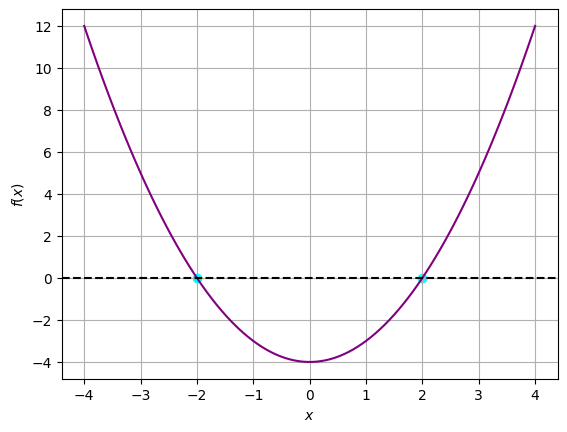

In [5]:
x=np.linspace(-4,4,100)
x_1,iter_1,err_1=regula_falsi(f,-1,4)
x_2,iter_2,err_2=regula_falsi(f,-4,1)
plt.plot(x,f(x), color = "purple")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.scatter([x_1,x_2],[f(x_1),f(x_2)],color='cyan')
plt.axhline(0,color='black', ls ="--")
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [6]:
def fuerza(a,x):
  q=2*10**(-5)
  Q=2*10**(-5)
  epsilon_0=8.854e-12
  return ((1)/(4*np.pi*epsilon_0))*((q*Q*x)/((x**2+a**2)**(3/2)))

In [7]:
fuerza(0.85,1)

1.590273286826934

<ipython-input-8-5ef0fab55014>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


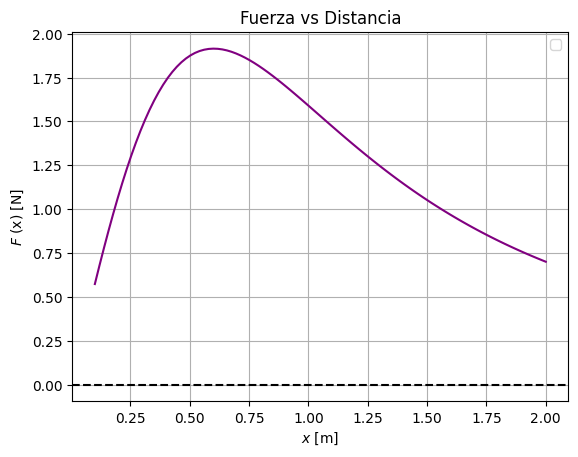

In [8]:
x1=np.linspace(0.1,2.0,100)
plt.plot(x1,fuerza(0.85,x1), color = "purple")
plt.axhline(0,color='black', ls='--')
plt.legend()
plt.xlabel("$x$ [m]")
plt.ylabel("$F$ (x) [N]")
plt.title("Fuerza vs Distancia")
plt.grid()
plt.show()

In [11]:
def newton_raphson(f,df,x0,tol=1e-8,max_iter=100):
  aproximaciones=[]
  for i in range(max_iter):
      f_x0=f(x0)
      df_x0=df(x0)
      if df_x0==0:
          raise ValueError("La derivada es cero y por lo tanto el metodo no puede continuar")
      x1=x0-(f_x0/df_x0)
      if abs(x1-x0)<tol:
          return x1,i+1
      aproximaciones.append(x1)
      x0=x1
  raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [12]:
def rocket(u,m_o,q,t,g=9.81):
  V=[]
  for i in range (t+1):
    if i==0:
      v=0
    elif m_o-q*i > 0:
      v=u*(np.log(m_o)-np.log(m_o-q*i))-g*i
    else:
      v=V[i-1]
    V.append(v)
  return V

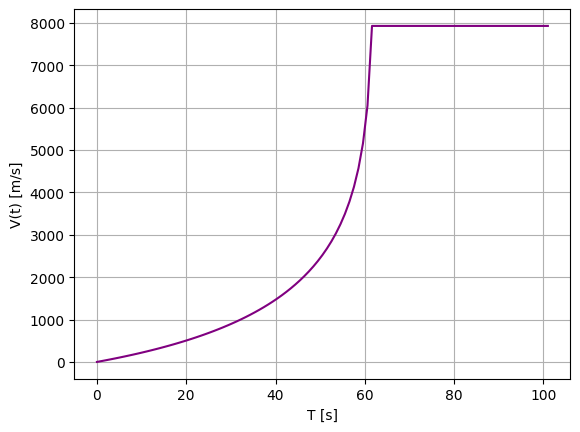

In [13]:
t=np.linspace(0,101,101)
V_t=rocket(1800,1.6*10**5,2600,100)

plt.plot(t,V_t, color = "purple", label="Velocidad vs Tiempo")
plt.xlabel("T [s]")
plt.ylabel("V(t) [m/s]")
plt.grid()
plt.show()

In [16]:
u=1800
m_o=1.6*10**5
q=2600
g=9.81
t=np.linspace(0,100,100)
f=lambda v: u*(np.log(m_o)-np.log(m_o-q*t))-g*t
df = lambda v: u*(1/(m_o-q*t))-g
newton_raphson(f,df,0)

<ipython-input-16-ae0635c2d9cf>:6: RuntimeWarning: invalid value encountered in log
  f=lambda v: u*(np.log(m_o)-np.log(m_o-q*t))-g*t


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()